In [1]:
import ee

# Initialize the Earth Engine module.
ee.Initialize()

In [2]:

aoi = ee.Geometry.Polygon([[16.423269379713, 48.484524861983],
                          [16.423269379713, 48.125585982779],
                          [16.979571008400, 48.125585982779],
                          [16.979571008400, 48.484524861983]])

In [ ]:
#################################
### export Sentinel 2A images ###
#################################

In [16]:
# filter sentinel 2A dataset
sen2_ic = ee.ImageCollection(ee.ImageCollection('COPERNICUS/S2_SR')
                       .filterBounds(aoi) 
                       .filterDate(ee.Date('2018-06-16'), ee.Date('2018-06-18'))
                       .sort('GRANULE_ID', False))

In [17]:
imageS2 = ee.Image(sen2_ic.first()).clip(aoi).select('B.*')

In [18]:
# list band names
imageS2.bandNames().getInfo()

['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12']

In [24]:
# download via google drive
task = ee.batch.Export.image.toDrive(image=imageS2,
                                     description='sentinel2_20180617_march',
                                     region=aoi,
                                     fileNamePrefix='export_march',
                                     crs='EPSG:32633',
                                     fileFormat='GeoTIFF',
                                     maxPixels=1800000000)
task.start()

In [55]:
task.status()

{'state': 'COMPLETED',
 'description': 'sentinel2_20180617_march',
 'creation_timestamp_ms': 1623319731152,
 'update_timestamp_ms': 1623320883928,
 'start_timestamp_ms': 1623319751698,
 'task_type': 'EXPORT_IMAGE',
 'destination_uris': ['https://drive.google.com/',
  'https://drive.google.com/',
  'https://drive.google.com/',
  'https://drive.google.com/',
  'https://drive.google.com/',
  'https://drive.google.com/',
  'https://drive.google.com/',
  'https://drive.google.com/',
  'https://drive.google.com/',
  'https://drive.google.com/',
  'https://drive.google.com/',
  'https://drive.google.com/',
  'https://drive.google.com/',
  'https://drive.google.com/',
  'https://drive.google.com/',
  'https://drive.google.com/'],
 'attempt': 1,
 'id': 'RFN3B4JSR2NEXFPADOV7AWO5',
 'name': 'projects/earthengine-legacy/operations/RFN3B4JSR2NEXFPADOV7AWO5'}

In [ ]:
#################################
### export Sentinel 1 GND ###
#################################

In [3]:
# Next, we filter the S1 archive to get an image over the aoi acquired sometime in August, 2020. 
# Any old image will do fine, so we won't bother to specify the orbit number or whether we want
# the ASCENDING or DESCENDING node
imageS1 = ee.Image(ee.ImageCollection('COPERNICUS/S1_GRD') 
                       .filterBounds(aoi) 
                       .filterDate(ee.Date('2018-04-17'), ee.Date('2018-04-21')) 
                       .first() 
                       .clip(aoi))
#.sort('GRANULE_ID', False))

In [4]:
imageS1.bandNames().getInfo()

['VV', 'VH', 'angle']

In [5]:
imageS1.getInfo()

{'type': 'Image',
 'bands': [{'id': 'VV',
   'data_type': {'type': 'PixelType', 'precision': 'double'},
   'dimensions': [4215, 4082],
   'origin': [7737, 12110],
   'crs': 'EPSG:32633',
   'crs_transform': [10, 0, 527792.7758107622, 0, -10, 5493149.891424081]},
  {'id': 'VH',
   'data_type': {'type': 'PixelType', 'precision': 'double'},
   'dimensions': [4215, 4082],
   'origin': [7737, 12110],
   'crs': 'EPSG:32633',
   'crs_transform': [10, 0, 527792.7758107622, 0, -10, 5493149.891424081]},
  {'id': 'angle',
   'data_type': {'type': 'PixelType', 'precision': 'float'},
   'dimensions': [4, 4],
   'origin': [11, 4],
   'crs': 'EPSG:32633',
   'crs_transform': [-12950.15147327166,
    -2856.47758146713,
    811134.9369330469,
    1824.3846291070804,
    -20176.168274845928,
    5448220.278710495]}],
 'id': 'COPERNICUS/S1_GRD/S1A_IW_GRDH_1SDV_20180420T050133_20180420T050158_021546_025215_0C31',
 'version': 1624115775572816,
 'properties': {'GRD_Post_Processing_start': 1524208469260,
  '

In [6]:
# download via google drive
task = ee.batch.Export.image.toDrive(image=imageS1.select('VH'),
                                     description='sentinel1_20180420_march_descending',
                                     region=aoi,
                                     fileNamePrefix='S1_20180420_march_d',
                                     crs='EPSG:32633',
                                     fileFormat='GeoTIFF',
                                     maxPixels=1800000000)
task.start()

In [7]:
task.status()

{'state': 'READY',
 'description': 'sentinel1_20180420_march_descending',
 'creation_timestamp_ms': 1624117499975,
 'update_timestamp_ms': 1624117499975,
 'start_timestamp_ms': 0,
 'task_type': 'EXPORT_IMAGE',
 'id': '3VLMTTAGZTJ7YUQ6VQARPZ64',
 'name': 'projects/earthengine-legacy/operations/3VLMTTAGZTJ7YUQ6VQARPZ64'}

In [ ]:
# specify extend
geoJSON = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              16.423269379713,
              48.484524861983
            ],
            [
              16.423269379713,
              48.125585982779
            ],
            [
              16.423269379713,
              48.125585982779
            ],
            [
              16.423269379713,
              48.484524861983
            ],
            [
              16.423269379713,
              48.484524861983
            ]
          ]
        ]
      }
    }
  ]
}

# get coordinates
coords = geoJSON['features'][0]['geometry']['coordinates']
# create ee.Geometry()
aoi = ee.Geometry.Polygon(coords)

In [26]:
x = [[369,   1,   1,  18,   2,   1,   4,   1,   0,   1,   1,   1],
       [  2, 381,   0,  15,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 391,   6,   0,   0,   0,   0,   0,   0,   2,   1],
       [  5,   6,   6, 336,   9,   0,   2,   0,   2,   8,  20,   6],
       [  2,  14,   0,   8, 335,   3,   7,  16,   0,   0,  15,   0],
       [  2,   7,   0,  18,   3, 364,   2,   2,   0,   0,   0,   2],
       [  0,   0,   0,   6,   3,   3, 382,   4,   0,   0,   0,   2],
       [  1,   1,   0,   4,  14,   3,   8, 367,   0,   0,   2,   0],
       [  0,   0,   0,   2,   0,   0,   0,   0, 388,   0,  10,   0],
       [  0,   0,   1,   4,   0,   0,   0,   3,   0, 387,   3,   2],
       [  3,   0,   0,   1,   3,   0,   0,   0,   0,   3, 370,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 204]]

In [32]:
x = [[376,   0,   2,  10,   1,   6,   2,   2,   0,   0,   0,   1],
       [  4, 389,   0,   5,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 396,   2,   0,   0,   0,   0,   0,   1,   1,   0],
       [  6,   7,   6, 345,   7,   0,   1,   1,   2,   6,  16,   3],
       [  0,  11,   0,   5, 355,   1,   9,   5,   0,   0,  14,   0],
       [  5,   2,   0,   9,   2, 381,   0,   0,   0,   0,   0,   1],
       [  1,   0,   0,   2,   1,   4, 392,   0,   0,   0,   0,   0],
       [  1,   0,   0,   1,   7,   0,   1, 389,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 396,   0,   4,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0, 394,   3,   1],
       [  3,   0,   0,   1,   4,   0,   0,   0,   0,   0, 372,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 204]]

In [5]:
l = len(x)
for xs in x:
    string = ''
    for i, xss in enumerate(xs):
        if i < l-1:
            string = string + str(xss) + ' & '
        else:
            string = string + str(xss) + ' \\\\'
    print(string)

369 & 1 & 1 & 18 & 2 & 1 & 4 & 1 & 0 & 1 & 1 & 1 \\
2 & 381 & 0 & 15 & 2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 391 & 6 & 0 & 0 & 0 & 0 & 0 & 0 & 2 & 1 \\
5 & 6 & 6 & 336 & 9 & 0 & 2 & 0 & 2 & 8 & 20 & 6 \\
2 & 14 & 0 & 8 & 335 & 3 & 7 & 16 & 0 & 0 & 15 & 0 \\
2 & 7 & 0 & 18 & 3 & 364 & 2 & 2 & 0 & 0 & 0 & 2 \\
0 & 0 & 0 & 6 & 3 & 3 & 382 & 4 & 0 & 0 & 0 & 2 \\
1 & 1 & 0 & 4 & 14 & 3 & 8 & 367 & 0 & 0 & 2 & 0 \\
0 & 0 & 0 & 2 & 0 & 0 & 0 & 0 & 388 & 0 & 10 & 0 \\
0 & 0 & 1 & 4 & 0 & 0 & 0 & 3 & 0 & 387 & 3 & 2 \\
3 & 0 & 0 & 1 & 3 & 0 & 0 & 0 & 0 & 3 & 370 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 204 \\


In [8]:
import numpy as np

In [33]:
x = np.array(x)

In [34]:
x.sum(axis=0)

array([396, 409, 404, 380, 379, 392, 405, 399, 398, 401, 411, 210])

In [35]:
x.sum(axis=1)

array([400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 380, 204])

In [36]:
np.round(x.max(axis=1)/x.sum(axis=1),3)

array([0.94 , 0.972, 0.99 , 0.862, 0.888, 0.952, 0.98 , 0.972, 0.99 ,
       0.985, 0.979, 1.   ])

In [37]:
np.round(x.max(axis=0)/x.sum(axis=0),3)

array([0.949, 0.951, 0.98 , 0.908, 0.937, 0.972, 0.968, 0.975, 0.995,
       0.983, 0.905, 0.971])

In [38]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(x, y, s=area1, marker='^', c=c)
plt.scatter(x, y, s=area2, marker='o', c=c)
# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()

In [45]:
y = np.array([[0.688, 0.855, 0.886, 0.881, 0.889, 0.914, 0.917],
[0.661, 0.860, 0.899, 0.890, 0.899, 0.932, 0.932],
[0.766, 0.968, 0.993, 0.981, 0.993, 0.996, 0.996],
[0.703, 0.908, 0.931, 0.928, 0.933, 0.956, 0.957]])

In [46]:
x = np.array(['LAI', 'S1', 'S2', 'LAI+S1', 'LAI+S2', 'S1+S2', 'All'])

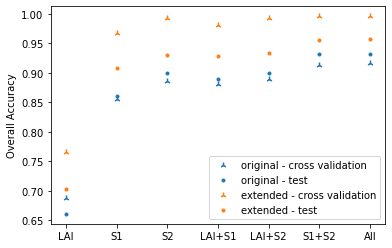

In [59]:
plt.scatter(x, y[0], marker='2', c='#1f77b4', label="original - cross validation")
plt.scatter(x, y[1], marker='.', c='#1f77b4', label="original - test")
plt.scatter(x, y[2], marker='2', c='#ff7f0e', label="extended - cross validation")
plt.scatter(x, y[3], marker='.', c='#ff7f0e', label="extended - test")

plt.ylabel("Overall Accuracy")
plt.legend(loc='lower right')

plt.show()

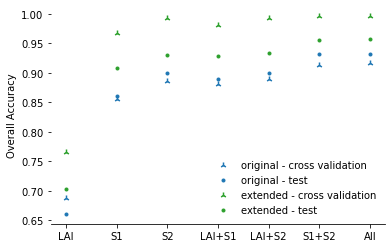

In [66]:
fig, ax = plt.subplots()
ax.scatter(x, y[0], marker='2', c='#1f77b4', label="original - cross validation")
ax.scatter(x, y[1], marker='.', c='#1f77b4', label="original - test")
ax.scatter(x, y[2], marker='2', c='#2ca02c', label="extended - cross validation")
ax.scatter(x, y[3], marker='.', c='#2ca02c', label="extended - test")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_visible(False)


plt.ylabel("Overall Accuracy")
ax.legend(loc='lower right',frameon = False)

plt.savefig('books_read.png', dpi=300)